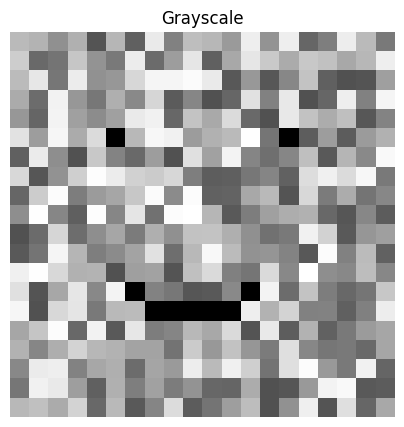

<Figure size 640x480 with 0 Axes>

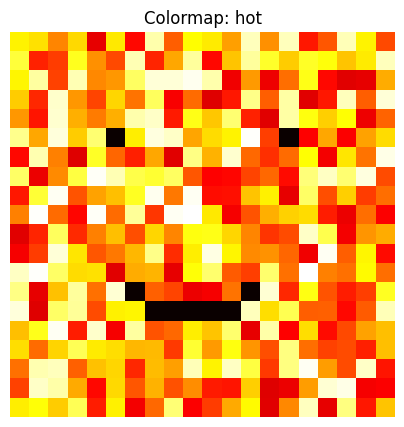

<Figure size 640x480 with 0 Axes>

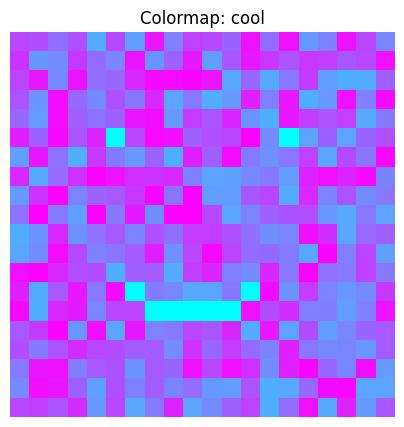

<Figure size 640x480 with 0 Axes>

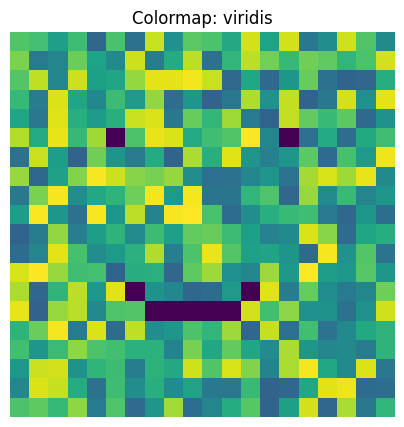

<Figure size 640x480 with 0 Axes>

In [5]:
# Phase 1: Load and Reveal the Image

# Imports & Packages
import numpy as np
import matplotlib.pyplot as plt

# a) Open the file (secret_image.csv).
path = 'secret_image.csv'

# b) read the pixel data
data = np.loadtxt(path, delimiter=',')

# c) Display grayscale
plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.title('Grayscale')
plt.axis('off')
plt.show()
plt.savefig('phase1_grayscale.png', bbox_inches='tight', pad_inches=0)

# d) Display with 3 different colormaps : hot, cool, viridis
for cmap in ('hot', 'cool', 'viridis'):
    plt.figure(figsize=(5,5))
    plt.imshow(data, cmap=cmap, vmin=data.min(), vmax=data.max())
    plt.title('Colormap: ' + cmap)
    plt.axis('off')
    plt.show()
    plt.savefig(f'phase1_{cmap}.png', bbox_inches='tight', pad_inches=0)

Number of black pixels: 9
Black Pixels Coordinates: 
 [[ 5  5]
 [ 5 14]
 [13  6]
 [13 12]
 [14  7]
 [14  8]
 [14  9]
 [14 10]
 [14 11]]
Bounding box:
  row (y) range: 5-14
  col (x) range: 5-14

 
to help Analyze the Pattern :


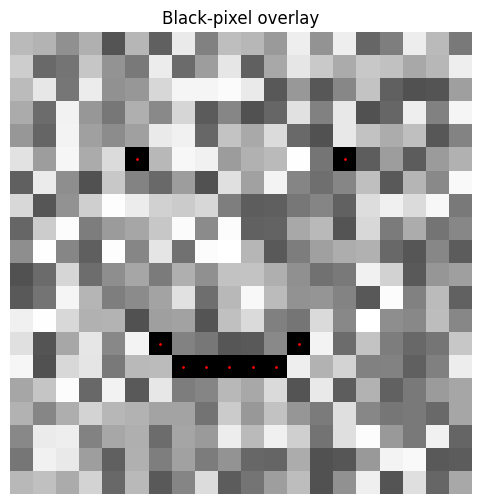

In [6]:
# Phase 2 : Pattern Detection and Analysis

# we will need "black pixels" in many steps , so we will create a mask for them
blackMask = (data == data.min())

# a) Count black pixels in the image
print('Number of black pixels:' , blackMask.sum())

# b) Extract and print the coordinates of black pixels
coords = np.column_stack(np.where(blackMask))
print("Black Pixels Coordinates: \n" , coords)

# c) Determine the bounding box (min and max x and y values)
minY, minX = coords.min(axis=0)
maxY, maxX = coords.max(axis=0)
print('Bounding box:')
print(f'  row (y) range: {minY}-{maxY}')
print(f'  col (x) range: {minX}-{maxX}')

# d) Analyze the pattern: Visualize the black pixels over the grayscale to spot patterns
print('\n \nto help Analyze the Pattern :')
plt.figure(figsize=(6,6))
plt.imshow(data, cmap='gray', vmin=data.min(), vmax=data.max())
plt.scatter(coords[:,1], coords[:,0], s=1, c='red')
plt.title('Black‐pixel overlay')
plt.axis('off')
plt.show()

**Analysis results :**

I can notice a Pattern

2 pixels for the eyes at Row 5 , one at max_X and the other in max_Y

2 pixels for the curve of the smile at Row 13

and the other 5 pixels for the mouth are at Row 14

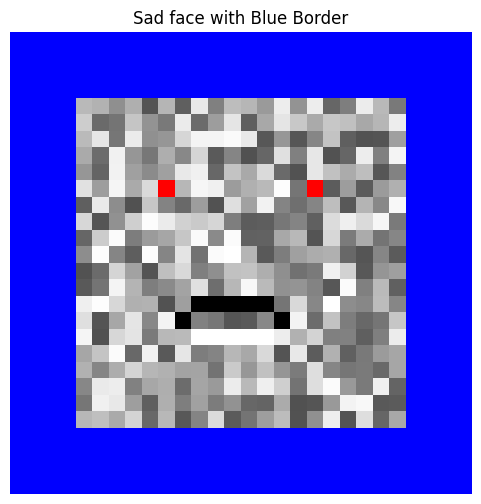

In [7]:
# Phase 3 : Modify the image
import cv2
from scipy import ndimage

# a) Convert to uint8 grayscale and then to RGB
gray_uint8 = ((data - data.min()) / np.ptp(data) * 255).astype(np.uint8)
rgb = cv2.cvtColor(gray_uint8, cv2.COLOR_GRAY2RGB)

#  Detect black pixels and label connected components
labeled, n_comp = ndimage.label(blackMask)
centroids = ndimage.center_of_mass(blackMask, labeled, list(range(1, n_comp+1)))

# Identify eyes
clusters = sorted(enumerate(centroids, start = 1), key=lambda x: x[1][0])
eye_labels  = [clusters[0][0], clusters[1][0]]

# b) change "eye" color to red
for lbl in eye_labels:
    rgb[labeled == lbl] = [255, 0, 0]

# c) Add a blue border around the image.

border_size = 4
rgb_bordered = cv2.copyMakeBorder(rgb, border_size, border_size, border_size, border_size, cv2.BORDER_CONSTANT, value=[0, 0, 255])

# d) flip the mouth vertically
mouth_coord1  = [(7, 14), (8, 14),(9, 14),(10,14),(11,14)] # original coordinates
mouth_coord2 = [(x+4,y+2) for x, y in mouth_coord1] # new coordinates

for i in range(len(mouth_coord1)) :
  XY1 = mouth_coord1[i]
  XY2 = mouth_coord2[i]
  rgb_bordered[XY1[1],XY1[0]] = rgb_bordered[XY2[1],XY2[0]]
  rgb_bordered[XY2[1],XY2[0]] = [0,0,0]

# remove old mouth
for x,y in mouth_coord1: rgb_bordered[y+4, x+4] = [255, 255, 255]


# e) Save & Display
cv2.imwrite('phase3_modified.png', cv2.cvtColor(rgb_bordered, cv2.COLOR_RGB2BGR))
plt.figure(figsize = (6,6))
plt.imshow(rgb_bordered)
plt.axis('off')
plt.title('Sad face with Blue Border')
plt.show()

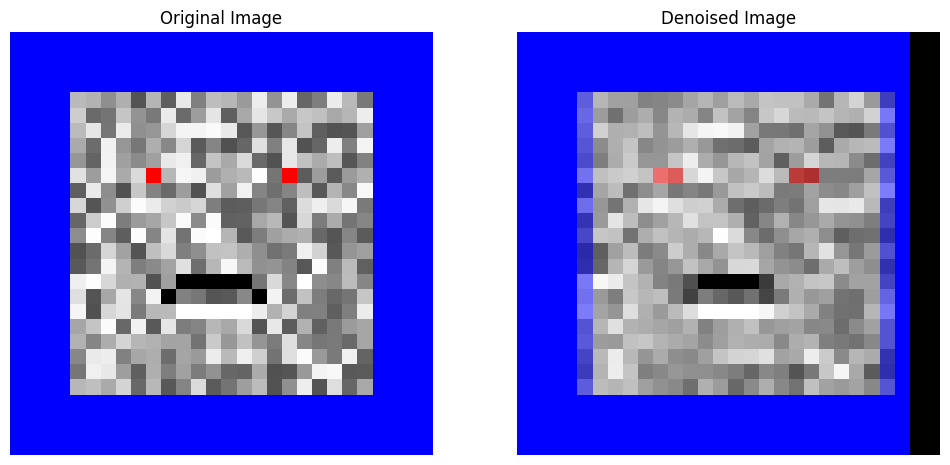

In [8]:
# Phase 4: Noise reduction filter

# a) Mean filter to reduce noise
denoised = cv2.blur(rgb_bordered, (2, 1))

# b) save both images
cv2.imwrite('phase4_denoised.png', cv2.cvtColor(denoised, cv2.COLOR_RGB2BGR))
cv2.imwrite('phase4_original.png', cv2.cvtColor(rgb_bordered, cv2.COLOR_RGB2BGR))

# c) compare
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(rgb_bordered)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(denoised)
axes[1].set_title('Denoised Image')
axes[1].axis('off')

plt.show()

In [9]:
# Phase 5 : Answer Of Some Questions :
print("Q : =  How many black pixels were found? ")
print("A : - " ,blackMask.sum())
print()
print("Q : = What are the coordinates of the black pixels? ")
coords = np.where(blackMask)
coord_tuples = [(int(x), int(y)) for x, y in zip(coords[0], coords[1])]
print("A : -" , coord_tuples)
print()
print('Q : = Bounding box:')
print(f'A : -  row (y) range: {minY}-{maxY}')
print(f'    -  col (x) range: {minX}-{maxX}')
print()
print('Q : = What Features did you detect in the image ?')
print('A : -Pattern Analysis :')
print('2 pixels (now they are red) for the eyes at Row 5 , one at max_X and the other in max_Y')
print('2 pixels for the curve of the smile at Row 13')
print('and the other 5 pixels for the mouth are at Row 12 (after editting it to a sad face)')
print('and a blue border around the image ')

Q : =  How many black pixels were found? 
A : -  9

Q : = What are the coordinates of the black pixels? 
A : - [(5, 5), (5, 14), (13, 6), (13, 12), (14, 7), (14, 8), (14, 9), (14, 10), (14, 11)]

Q : = Bounding box:
A : -  row (y) range: 5-14
    -  col (x) range: 5-14

Q : = What Features did you detect in the image ?
A : -Pattern Analysis :
2 pixels (now they are red) for the eyes at Row 5 , one at max_X and the other in max_Y
2 pixels for the curve of the smile at Row 13
and the other 5 pixels for the mouth are at Row 12 (after editting it to a sad face)
and a blue border around the image 
